## Clustering by K-means

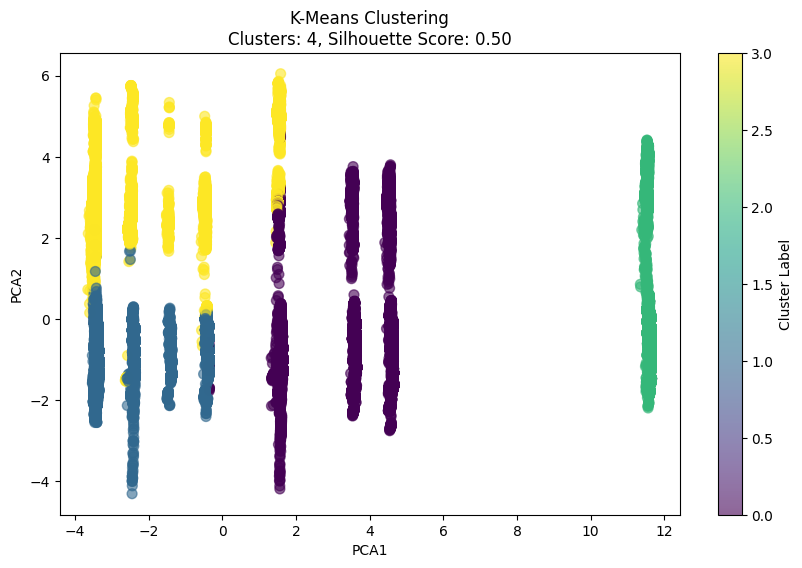

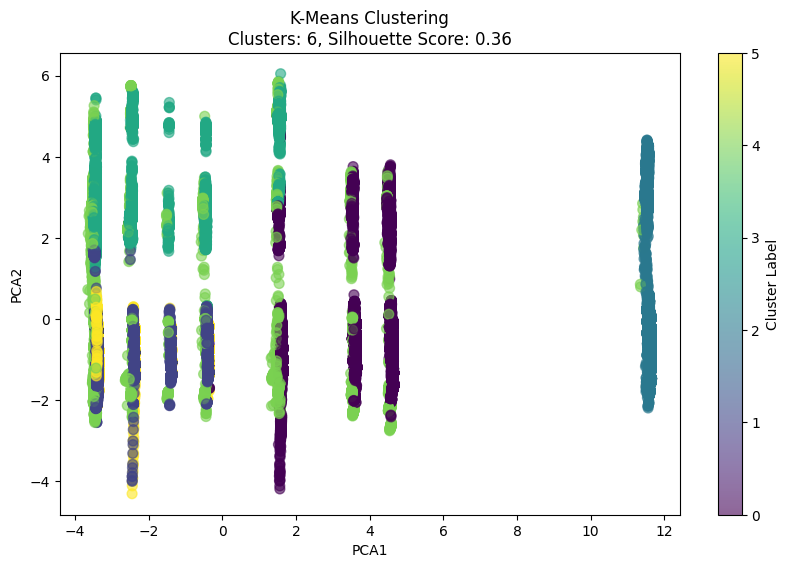

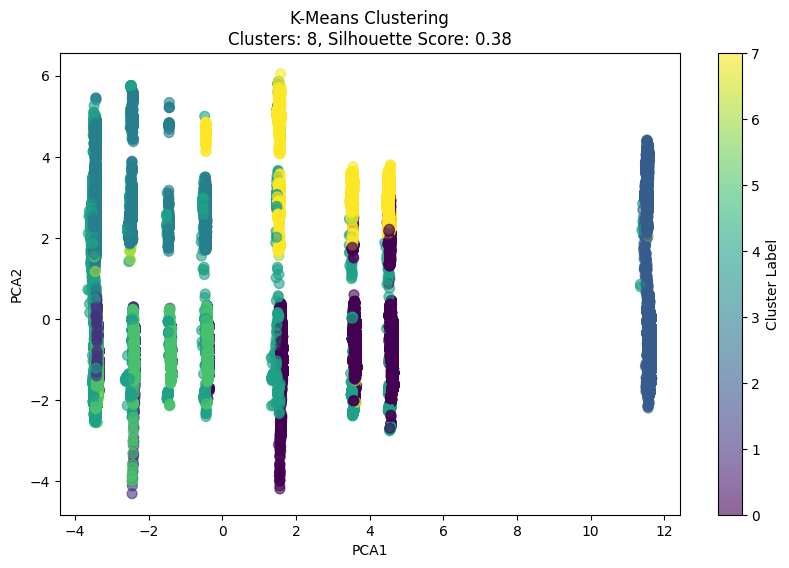

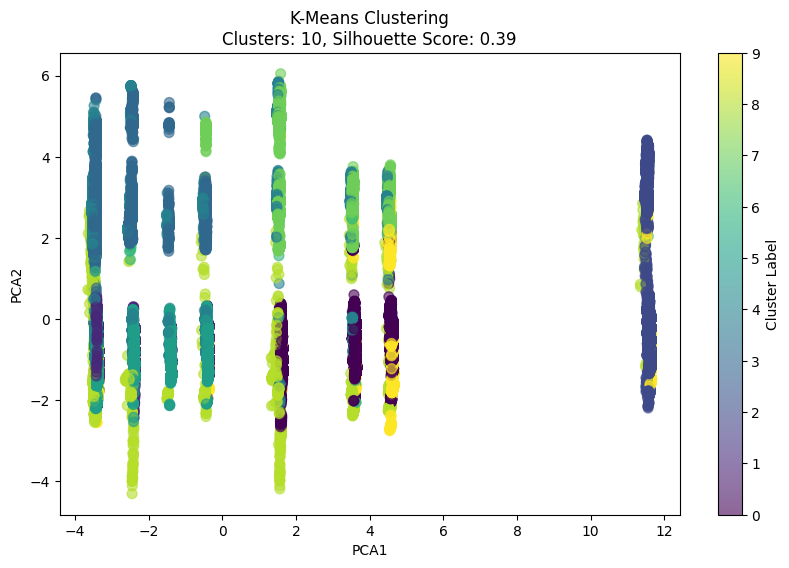

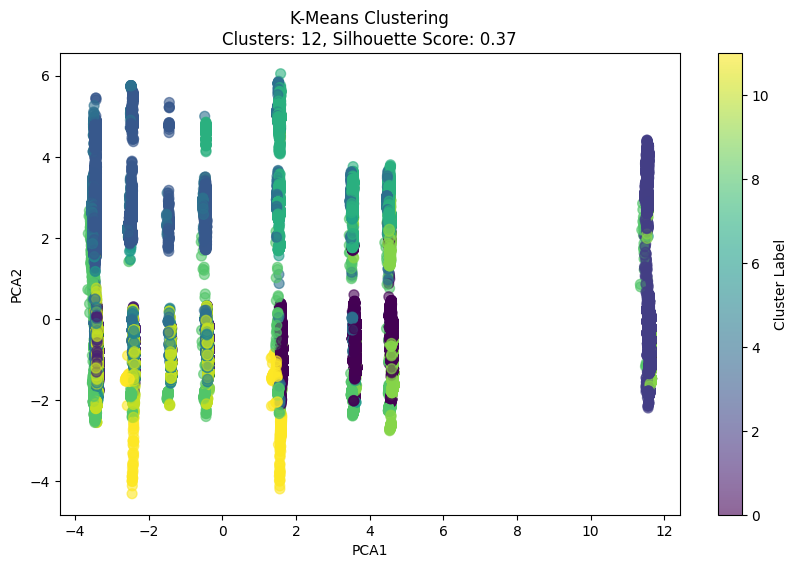

In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume combined_data is your existing DataFrame, pca_features is the reduced dataset

# List of cluster numbers to try
cluster_numbers = [4, 6, 8, 10, 12]

# Number of samples to use for silhouette score calculation
num_samples = 20000

# Perform K-Means clustering for all cluster numbers first
kmeans_labels_all = {}  # Dictionary to store k-means labels for each number of clusters
silhouette_scores = {}  # Dictionary to store silhouette scores for each number of clusters

# Loop through each cluster number to run the clustering and compute silhouette scores
for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(pca_features)  # Assuming pca_features is the reduced dataset
    kmeans_labels_all[n_clusters] = kmeans_labels  # Store the labels

    # Randomly select 20,000 samples to calculate silhouette score
    if len(pca_features) > num_samples:
        random_indices = np.random.choice(len(pca_features), num_samples, replace=False)
        random_samples = pca_features[random_indices]
        random_labels = kmeans_labels[random_indices]
    else:
        random_samples = pca_features
        random_labels = kmeans_labels

    # Calculate and store silhouette score for the current clustering
    sil_score_kmeans = silhouette_score(random_samples, random_labels)
    silhouette_scores[n_clusters] = sil_score_kmeans

    # Visualize the clustering results for the current n_clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, s=50)
    plt.title(f"K-Means Clustering\nClusters: {n_clusters}, Silhouette Score: {sil_score_kmeans:.2f}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.colorbar(label='Cluster Label')
    plt.show()